In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the data
df1 = pd.read_csv("../experiments/DeepRM_2/simu5,numex5,epoch51/test_metrics.csv")
df1.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,SJF,1.25,5,5,1,0.5
1,SJF,1.00,4,5,1,0.5
2,SJF,1.50,6,5,1,0.5
3,SJF,1.00,4,5,1,0.5
4,DeepRM_2,1.50,6,5,1,0.5


In [20]:
df2 = pd.read_csv("../experiments/DeepRM_ECO/simu5,numex5,epoch51/test_metrics.csv")
df2.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,SJF,1.25,5,5,1,0.5
1,SJF,1.00,4,5,1,0.5
2,SJF,1.50,6,5,1,0.5
3,SJF,1.00,4,5,1,0.5
4,DeepRM_ECO,3.75,15,5,1,0.5


In [21]:
df3 = pd.read_csv("../experiments/DeepRM_ECO/simu50,numex15,epoch51/test_metrics.csv")
df3.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
0,SJF,33.489796,1641,50,1,0.5
1,SJF,25.755102,1262,50,1,0.5
2,SJF,33.387755,1636,50,1,0.5
3,SJF,37.204082,1823,50,1,0.5
4,SJF,23.020408,1128,50,1,0.5


In [8]:
df1["Anomaly rate"].isna().any()

False

In [9]:
# # Fill the missing values in the "Anomaly rate" column with 0.5
# df1["Anomaly rate"].fillna(0.5, inplace=True)
# df1.head()

In [10]:
df2["Anomaly rate"].isna().any()

False

In [23]:
df3["Anomaly rate"].isna().any()

False

In [11]:
# df2["Anomaly rate"].fillna(0.5, inplace=True)
# df2.head()

In [10]:
df1 = df1.loc[df1["Test Type"] != "SJF"]
df1.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
4,DeepRM_2,1.50,6,5,1,0.5
6,DeepRM_2,1.75,7,5,1,0.5
8,DeepRM_2,2.00,8,5,1,0.5
10,DeepRM_2,1.75,7,5,1,0.5
12,DeepRM_2,2.50,10,5,1,0.5


In [11]:
df2 = df2.loc[df2["Test Type"] != "SJF"]
df2.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
4,DeepRM_ECO,3.75,15,5,1,0.5
6,DeepRM_ECO,1.25,5,5,1,0.5
8,DeepRM_ECO,4.50,18,5,1,0.5
10,DeepRM_ECO,3.25,13,5,1,0.5
12,DeepRM_ECO,4.00,16,5,1,0.5


In [24]:
df3 = df3.loc[df3["Test Type"] != "SJF"]
df3.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
14,DeepRM_ECO,4.775510,234,50,1,0.5
16,DeepRM_ECO,6.204082,304,50,1,0.5
18,DeepRM_ECO,8.122449,398,50,1,0.5
20,DeepRM_ECO,7.979592,391,50,1,0.5
22,DeepRM_ECO,8.163265,400,50,1,0.5


In [12]:
average_slowdown = df1.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown = average_slowdown.reset_index()

In [13]:
average_slowdown2 = df2.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown2 = average_slowdown2.reset_index()

In [25]:
average_slowdown3 = df3.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown3 = average_slowdown3.reset_index()

In [14]:
average_slowdown.head()

,Workload,Anomaly rate,Average Slowdown
0,5,0.5,1.48


In [15]:
average_slowdown2.head()

,Workload,Anomaly rate,Average Slowdown
0,5,0.5,2.87


In [26]:
average_slowdown3.head()

,Workload,Anomaly rate,Average Slowdown
0,50,0.5,7.877007


In [16]:
df1_01 = df1[df1['Anomaly rate'] == 0.5]
df2_01 = df2[df2['Anomaly rate'] == 0.5]
df2_01.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
4,DeepRM_ECO,3.75,15,5,1,0.5
6,DeepRM_ECO,1.25,5,5,1,0.5
8,DeepRM_ECO,4.50,18,5,1,0.5
10,DeepRM_ECO,3.25,13,5,1,0.5
12,DeepRM_ECO,4.00,16,5,1,0.5


<module 'matplotlib.pyplot' from '/sw/arch/RHEL8/EB_production/2022/software/Anaconda3/2022.05/lib/python3.9/site-packages/matplotlib/pyplot.py'>

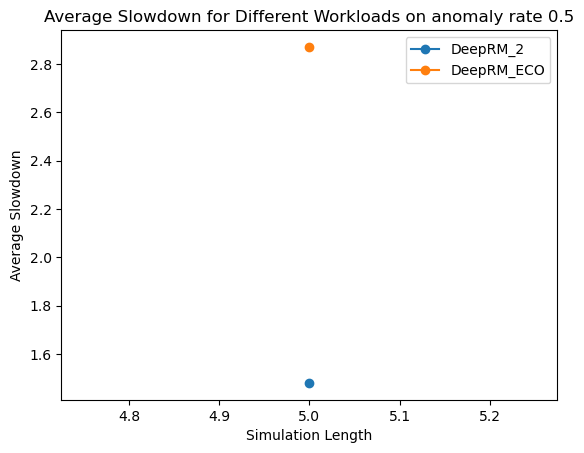

In [18]:
workloads1 = df1_01['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df1_01[df1_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df2_01['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df2_01[df2_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]


plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM_2')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM_ECO')

plt.title('Average Slowdown for Different Workloads on anomaly rate 0.5')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')
plt.legend()
plt

In [76]:
df1_03 = df1[df1['Anomaly rate'] == 0.3]
df2_03 = df2[df2['Anomaly rate'] == 0.3]
df3_03 = df3[df3['Anomaly rate'] == 0.3]
df4_03 = df4[df4['Anomaly rate'] == 0.3]
df2_03.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
1799,DeepRM,2.833333,17,50,1,0.3
1801,DeepRM,5.500000,66,50,1,0.3
1803,DeepRM,2.400000,12,50,1,0.3
1805,DeepRM,5.153846,67,50,1,0.3
1807,DeepRM,5.692308,74,50,1,0.3


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

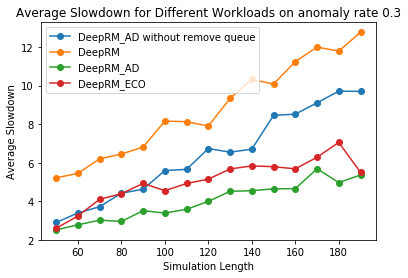

In [77]:
import matplotlib.pyplot as plt



workloads1 = df1_03['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df1_03[df1_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df2_03['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df2_03[df2_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df3_03['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df3_03[df3_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads3]

workloads4 = df4_03['Workload'].unique()
workloads4.sort()
average_slowdowns4 = [df4_03[df4_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads4]



plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM_AD without remove queue')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM')
plt.plot(workloads3, average_slowdowns3, 'o-', label='DeepRM_AD')
plt.plot(workloads4, average_slowdowns4, 'o-', label='DeepRM_ECO')


plt.title('Average Slowdown for Different Workloads on anomaly rate 0.3')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')
plt.legend()
plt

In [78]:
df1_05 = df1[df1['Anomaly rate'] == 0.5]
df2_05 = df2[df2['Anomaly rate'] == 0.5]
df3_05 = df3[df3['Anomaly rate'] == 0.5]
df4_05 = df4[df4['Anomaly rate'] == 0.5]
df3_05.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
3599,DeepRM_AD,1.333333,16,50,1,0.5
3601,DeepRM_AD,1.250000,10,50,1,0.5
3603,DeepRM_AD,1.444444,13,50,1,0.5
3605,DeepRM_AD,1.571429,11,50,1,0.5
3607,DeepRM_AD,1.333333,20,50,1,0.5


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

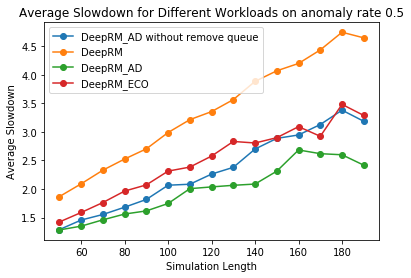

In [79]:
import matplotlib.pyplot as plt



workloads1 = df1_05['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df1_05[df1_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df2_05['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df2_05[df2_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df3_05['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df3_05[df3_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads3]

workloads4 = df4_05['Workload'].unique()
workloads4.sort()
average_slowdowns4 = [df4_05[df4_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads4]


plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM_AD without remove queue')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM')
plt.plot(workloads3, average_slowdowns3, 'o-', label='DeepRM_AD')
plt.plot(workloads4, average_slowdowns4, 'o-', label='DeepRM_ECO')

plt.title('Average Slowdown for Different Workloads on anomaly rate 0.5')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')
plt.legend()
plt

In [29]:
dfm = pd.read_csv('../metrics.csv')

dfm['NewStep'] = dfm.index // 9 + 1

# Replace the 'Step' column with the new values
dfm['Step'] = dfm['NewStep']

# Drop the 'NewStep' column
dfm = dfm.drop(columns=['NewStep'])
dfm
dfm.to_csv('metrics.csv', index=False)

In [80]:
df_ad = pd.read_csv('../experiments/experiment_results_origin/test_metrics.csv')
df_ad_nr= pd.read_csv('../experiments/experiment_results_NR/test_metrics.csv')
df_ad_ad= pd.read_csv('../experiments/experiment_results_AD/test_metrics.csv')
df_ad_eco= pd.read_csv('../experiment_results_ECO/test_metrics.csv')

In [81]:
df_ad["Anomaly rate"].fillna(0.1, inplace=True)
df_ad_nr["Anomaly rate"].fillna(0.1, inplace=True)
df_ad_ad["Anomaly rate"].fillna(0.1, inplace=True)
df_ad_eco["Anomaly rate"].fillna(0.1, inplace=True)
#df2.head()

In [82]:
df_ad = df_ad.loc[df_ad["Test Type"] != "SJF"]
df_ad_nr = df_ad_nr.loc[df_ad_nr["Test Type"] != "SJF"]
df_ad_ad = df_ad_ad.loc[df_ad_ad["Test Type"] != "SJF"]
df_ad_eco = df_ad_eco.loc[df_ad_eco["Test Type"] != "SJF"]

In [83]:
average_slowdown_ad = df_ad.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown_ad = average_slowdown_ad.reset_index()

average_slowdown_nr = df_ad_nr.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown_nr = average_slowdown_nr.reset_index()

average_slowdown_ad_ad = df_ad_ad.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown_ad_ad = average_slowdown_ad_ad.reset_index()

average_slowdown_eco = df_ad_eco.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown_eco = average_slowdown_eco.reset_index()
average_slowdown_eco.head()

,Workload,Anomaly rate,Average Slowdown
0,50,0.1,11.107547
1,50,0.3,7.115354
2,50,0.5,6.763189
3,60,0.1,14.487631
4,60,0.3,12.152608


In [84]:
df_ad_01 = df_ad[df_ad['Anomaly rate'] == 0.1]
df_ad_nr_01 = df_ad_nr[df_ad_nr['Anomaly rate'] == 0.1]
df_ad_ad_01 = df_ad_ad[df_ad_ad['Anomaly rate'] == 0.1]
df_ad_eco_01 = df_ad_eco[df_ad_eco['Anomaly rate'] == 0.1]
df_ad_eco_01.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
1,DeepRM_ECO,10.319149,485,50,1,0.1
3,DeepRM_ECO,11.270833,541,50,1,0.1
5,DeepRM_ECO,9.723404,457,50,1,0.1
7,DeepRM_ECO,11.673913,537,50,1,0.1
9,DeepRM_ECO,8.187500,393,50,1,0.1


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

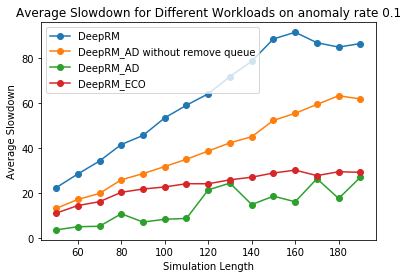

In [85]:
import matplotlib.pyplot as plt



workloads1 = df_ad_01['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df_ad_01[df_ad_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df_ad_nr_01['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df_ad_nr_01[df_ad_nr_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df_ad_ad_01['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df_ad_ad_01[df_ad_ad_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads3]

workloads4 = df_ad_eco_01['Workload'].unique()
workloads4.sort()
average_slowdowns4 = [df_ad_eco_01[df_ad_eco_01['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads4]



plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM_AD without remove queue')
plt.plot(workloads3, average_slowdowns3, 'o-', label='DeepRM_AD')
plt.plot(workloads4, average_slowdowns4, 'o-', label='DeepRM_ECO')

plt.title('Average Slowdown for Different Workloads on anomaly rate 0.1')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')
plt.legend()
plt

In [86]:
df_ad_03 = df_ad[df_ad['Anomaly rate'] == 0.3]
df_ad_nr_03 = df_ad_nr[df_ad_nr['Anomaly rate'] == 0.3]
df_ad_ad_03 = df_ad_ad[df_ad_ad['Anomaly rate'] == 0.3]
df_ad_eco_03 = df_ad_eco[df_ad_eco['Anomaly rate'] == 0.3]
df_ad_eco_03.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
1799,DeepRM_ECO,3.285714,46,50,1,0.3
1801,DeepRM_ECO,4.562500,73,50,1,0.3
1803,DeepRM_ECO,7.769231,101,50,1,0.3
1805,DeepRM_ECO,2.666667,40,50,1,0.3
1807,DeepRM_ECO,2.941176,50,50,1,0.3


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

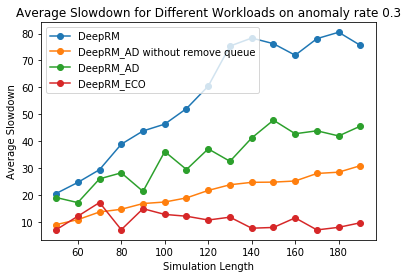

In [87]:
import matplotlib.pyplot as plt



workloads1 = df_ad_03['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df_ad_03[df_ad_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df_ad_nr_03['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df_ad_nr_03[df_ad_nr_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df_ad_ad_03['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df_ad_ad_03[df_ad_ad_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads3]

workloads4 = df_ad_eco_03['Workload'].unique()
workloads4.sort()
average_slowdowns4 = [df_ad_eco_03[df_ad_eco_03['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads4]



plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM_AD without remove queue')
plt.plot(workloads3, average_slowdowns3, 'o-', label='DeepRM_AD')
plt.plot(workloads4, average_slowdowns4, 'o-', label='DeepRM_ECO')

plt.title('Average Slowdown for Different Workloads on anomaly rate 0.3')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')
plt.legend()
plt

In [88]:
df_ad_05 = df_ad[df_ad['Anomaly rate'] == 0.5]
df_ad_nr_05 = df_ad_nr[df_ad_nr['Anomaly rate'] == 0.5]
df_ad_ad_05 = df_ad_ad[df_ad_ad['Anomaly rate'] == 0.5]
df_ad_eco_05 = df_ad_eco[df_ad_eco['Anomaly rate'] == 0.5]
df_ad_eco_05.head()

,Test Type,Average Slowdown,Total Slowdown,Workload,Dist Proba,Anomaly rate
3599,DeepRM_ECO,3.583333,43,50,1,0.5
3601,DeepRM_ECO,4.285714,90,50,1,0.5
3603,DeepRM_ECO,3.500000,49,50,1,0.5
3605,DeepRM_ECO,4.388889,79,50,1,0.5
3607,DeepRM_ECO,2.200000,11,50,1,0.5


<module 'matplotlib.pyplot' from '/home/ubuntu/DeepRM_ECO/p2venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

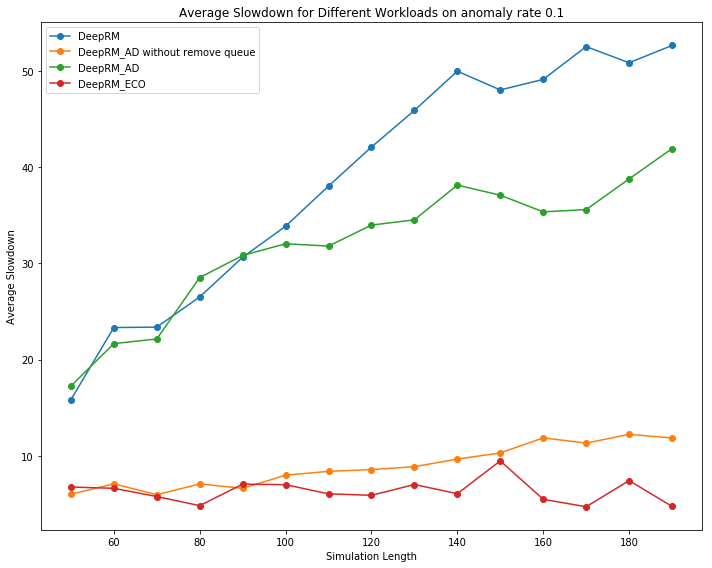

In [92]:
import matplotlib.pyplot as plt



workloads1 = df_ad_05['Workload'].unique()
workloads1.sort()
average_slowdowns1 = [df_ad_05[df_ad_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads1]

workloads2 = df_ad_nr_05['Workload'].unique()
workloads2.sort()
average_slowdowns2 = [df_ad_nr_05[df_ad_nr_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads2]

workloads3 = df_ad_ad_05['Workload'].unique()
workloads3.sort()
average_slowdowns3 = [df_ad_ad_05[df_ad_ad_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads3]

workloads4 = df_ad_eco_05['Workload'].unique()
workloads4.sort()
average_slowdowns4 = [df_ad_eco_05[df_ad_eco_05['Workload'] == workload]['Average Slowdown'].mean() for workload in workloads4]

plt.figure(figsize=(10, 8))

plt.plot(workloads1, average_slowdowns1, 'o-', label='DeepRM')
plt.plot(workloads2, average_slowdowns2, 'o-', label='DeepRM_AD without remove queue')
plt.plot(workloads3, average_slowdowns3, 'o-', label='DeepRM_AD')
plt.plot(workloads4, average_slowdowns4, 'o-', label='DeepRM_ECO')

plt.title('Average Slowdown for Different Workloads on anomaly rate 0.1')
plt.xlabel('Simulation Length')
plt.ylabel('Average Slowdown')

plt.tight_layout() 
plt.legend()
plt